In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import glob
import rarfile, os
from collections import Counter
from PIL import Image
from datetime import datetime
import shutil

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [2]:
img = rgb2gray(plt.imread('test.jpg'))
img.shape

(279, 640)

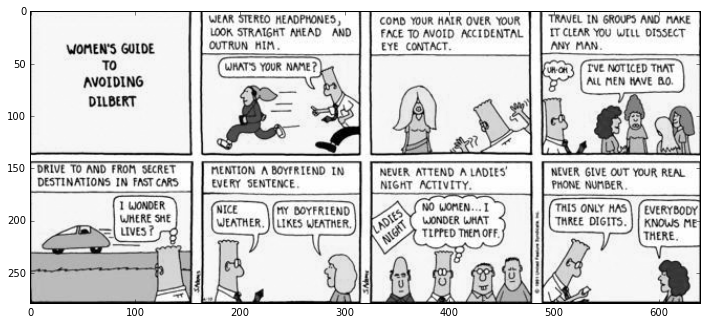

In [3]:
plt.figure(figsize=(12,6))
plt.imshow(img, cmap=plt.cm.gray)

[  0   0 136 137 144 278 279]
[  0 136   1   7 134   1]
[  0 144]
[136 134]
101.684109853 7
106.816154776 7


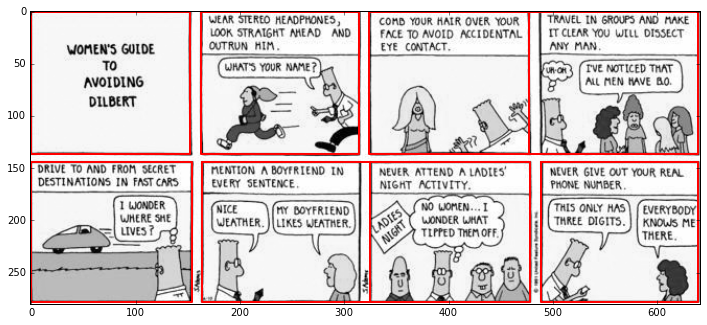

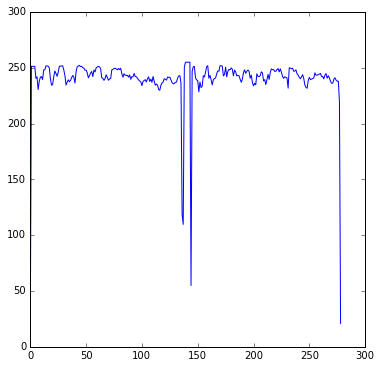

In [6]:
def plotBox(xmin, xmax, ymin, ymax):
    plt.plot([xmin, xmax, xmax, xmin, xmin],
             [ymin, ymin, ymax, ymax, ymin], color='r', lw=2)

def threshold(img, thresh=60):
    Y = np.zeros(img.shape)+255
    Y[img < thresh] = img[img < thresh]
    return(Y)
    
# linethresh = 180

nx,ny = 90,90
Y = threshold(img)
linethresh = np.clip(np.percentile(np.mean(Y, axis=1), 4), 0, 180)
ylines = np.where(np.mean(Y,1) <= linethresh)[0]
if len(ylines):
    # two rows
    lines = (np.concatenate([[0], ylines,[img.shape[0]]]))
    deltas = np.diff(lines)
    yoffsets = lines[np.where(deltas>=ny)[0]]#[::2]
    heights = deltas[np.where(deltas>=ny)[0]]#[::2]
    print(lines)
    print(deltas)
    print (yoffsets)
    print(heights)
else:
    print(ylines)
    plt.plot(np.mean(Y,1))
    raise(ValueError('Could not figure out boxes'))

plt.figure(figsize=(12,6))
plt.imshow(img, cmap=plt.cm.gray)
plt.xlim(-1, img.shape[1]+1)
plt.ylim(img.shape[0]+1,-1)
    
for yoffset,height in zip(yoffsets, heights):
    X = Y[yoffset:yoffset+height,:]
    linethresh = np.clip(np.percentile(np.mean(X, axis=0), 1),0,180)
    xlines = np.where(np.mean(X, 0) <= linethresh)[0]
    
    if len(xlines):
        # 4 columns
        lines = (np.concatenate([[0], xlines,[img.shape[1]]]))
        deltas = np.diff(lines)
        xoffsets = lines[np.where(deltas>=nx)[0]]#[::2]
        widths = deltas[np.where(deltas>=nx)[0]]#[::2]
        print(linethresh, len(xlines))
        for xoffset, width in zip(xoffsets, widths):
            plotBox(xoffset, xoffset+width, yoffset, yoffset+height)
    else:
        print(len(xlines))
        raise(ValueError('Not Sure'))
#         break
    
#     break

# plt.figure(figsize=(12,6))
# plt.imshow(Y, cmap=plt.cm.gray)
plt.figure(figsize=(6,6))
plt.plot(np.mean(Y, axis=1))
    
# plt.figure(figsize=(12,6))
# plt.imshow(X, cmap=plt.cm.gray)
# plt.figure(figsize=(6,6))
# plt.plot(np.mean(X, axis=0))


# plt.plot(np.mean(X, axis=0))

In [8]:
pattern = '/Users/ajmendez/data/dilbert/raw/*.rar'
sizes = Counter()
for filename in sorted(glob.iglob(pattern)):
    year = int(re.findall('\d+', filename)[0])
    
    try:
        with rarfile.RarFile(filename, crc_check=False) as rf:
            files = sorted(rf.namelist())
            goodfiles = [f for f in files
                         if ('.gif' in f) or (not (f.replace('.jpg','-colour.jpg') in files) )]
            for i,f in enumerate(goodfiles):
                try:
                    img = plt.imread(rf.open(f))
                except Exception as e:
                    print('Failed to read {}: {}'.format(f,e))
                if len(img.shape) in [3,4]:
                    # automatically drops alpha channel
                    img = rgb2gray(img)
                    
                sizes[(img.shape[0], img.shape[1], year)] += 1
    except Exception as e:
        print(e)


ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5

Failed to read Dilbert 1994\dilbert19940807.gif.missing: cannot identify image file <rarfile.DirectReader object at 0x10febe780>
Failed to read Dilbert 1996\dilbert19960313.gif: broken data stream when reading image file
Failed to read Dilbert 1996\dilbert19960804.jpg: image file is truncated (9 bytes not processed)
Failed to read Dilbert 1998\dilbert19980619.gif: image file is truncated (208 bytes not processed)

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5


Failed to read dilbert20080621-colour.jpg: cannot identify image file <rarfile.DirectReader object at 0x10febea20>

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5


Failed to read dilbert20121222-colour.jpg: cannot identify image file <rarfile.DirectReader object at 0x11129c4a8>

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/ajmendez/.local/anaconda3/lib/python3.5


Failed to read dilbert20150805-colour.jpg: cannot identify image file <rarfile.DirectReader object at 0x11129c4a8>


In [9]:
def myround(x, base=10):
    return int(base * round(float(x)/base))

generalsizes = Counter()
for (height,width,year),number in sizes.items():
    generalsizes[(myround(height),myround(width))] += number

framespercomic = 3*(5/6) + 8*(1/6)
ncomics = sum(sizes.values())
print('Total Shapes: {:,d}, Total Images: {:,d}; Total Panels: {:0,.0f}'
      .format(len(generalsizes), ncomics, framespercomic*ncomics))

Total Shapes: 63, Total Images: 9,817; Total Panels: 37,632


[<matplotlib.text.Text at 0x1094a43c8>, <matplotlib.text.Text at 0x111662d30>]

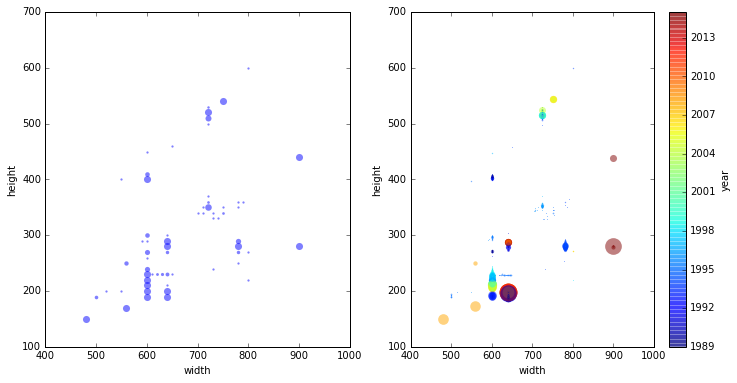

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax1)
for (height,width),number in generalsizes.items():
    sca = plt.scatter(width, height, s=np.clip(number,5,50), lw=0, alpha=0.5)
ax1.set(xlabel='width', ylabel='height',)


plt.sca(ax2)
for (height,width, year),number in sizes.items():
    sca = plt.scatter(width, height, c=year, vmin=1989, vmax=2015,
                      s=number, lw=0, alpha=0.5)
plt.colorbar(sca, label='year')
ax2.set(xlabel='width', ylabel='height')



In [11]:
for (height,width, year),number in sizes.items():
    sca = plt.scatter(width, height, c=year, vmin=1989, vmax=2015,s=number, lw=0, alpha=0.5)
plt.colorbar(sca, label='year')
plt.gca().set(xlabel='width', xlim=[0, 1000],
              ylabel='height', ylim=[0, 700])

framespercomic = 3*(5/6) + 8*(1/6)d
ncomics = sum(sizes.values())
print('Total Images: {:,d}; Total Panels: {:0,.0f}'.format(ncomics, framespercomic*ncomics))

SyntaxError: invalid syntax (<ipython-input-11-e1edbf49146f>, line 7)

In [ ]:
def carve(img, nx=100, ny=100, linethresh=None):
    Y = threshold(img)
    linethresh = np.clip(np.percentile(np.mean(Y, axis=1), 4), 0, 180)
    ylines = np.where(np.mean(Y,1)<linethresh)[0]
    lines = (np.concatenate([[0], ylines,[img.shape[0]]]))
    deltas = np.diff(lines)
    yoffsets = lines[np.where(deltas>ny)[0]]#[::2]
    heights = deltas[np.where(deltas>ny)[0]]#[::2]
    
    for yoffset,height in zip(yoffsets, heights):
        X = Y[yoffset:yoffset+height,:]
        xmean = np.mean(X, axis=0)/np.std(X, axis=0)
        xlines = np.where(xmean < 1)[0]
#         linethresh = np.clip(np.percentile(xmean, 4), 0, 180)
#         linethresh = np.percentile(xmean, np.pi)
#         xlines = np.where(np.mean(X, 0) < linethresh)[0]

        lines = (np.concatenate([[0], xlines,[img.shape[1]]]))
        deltas = np.diff(lines)
        xoffsets = lines[np.where(deltas>ny)[0]]#[::2]
        widths = deltas[np.where(deltas>ny)[0]]#[::2]
        
#         plt.figure(1)
#         plt.axhline(1)
#         plt.plot(xmean)
#         plt.xlim(0,2)
        
#         print(sxoffsets)
#         print(widths)
        for xoffset, width in zip(xoffsets, widths):
            yield xoffset, xoffset+width, yoffset, yoffset+height
#             yield img[yoffset:yoffset+height, 
#                       xoffset:xoffset+width]

def genAxes():
    fig, axes = plt.subplots(5,5, figsize=(12,12), 
                         subplot_kw={'xticks':[], 'yticks':[]})
    for ax in axes.flatten():
        yield ax

    

Axes = genAxes()
sz = Counter()
images = {}
pattern = '/Users/ajmendez/data/dilbert/raw/*.rar'
for filename in sorted(glob.iglob(pattern)):
    try:
        with rarfile.RarFile(filename, crc_check=False) as rf:
            files = sorted(rf.namelist())
            goodfiles = [f for f in files
                         if ('.gif' in f) or (not (f.replace('.jpg','-colour.jpg') in files) )]
            for i,f in enumerate(goodfiles):
                try:
                    img = plt.imread(rf.open(f))
                except Exception as e:
                    print('Could not load {}: {}'.format(f,e))
                
                key = (myround(img.shape[0]), myround(img.shape[1]))
                if key in sz:
                    continue
#                 raise ValueError('Done')
                sz[key] += 1
                if len(img.shape) in [3,4]:
                    img = rgb2gray(img)
                
                plt.sca(next(Axes))
                title = '{:%Y-%m-%d %a}'.format(getDate(f))
                plt.gca().set(title=title)
                plt.imshow(img, cmap=plt.cm.gray)
                for im in carve(img):
                    plotBox(*im)
                plt.autoscale(enable=True, axis='both', tight=True)
                
                
                # save
                images[title] = img
                if i > 1:
                    break
    except StopIteration:
        break
    except Exception as e:
        print('Failed to load: {}: {}'.format(filename,e))
        break
#     break
# plt.show()

In [ ]:
def getDate(filename, split='\\'):
    if split in filename:
        s = re.findall('\d+', filename.split(split)[-1])[0]
    else:
        s = re.findall('\d+', filename)[0]
    return datetime.strptime(s, '%Y%m%d')
'{:%Y-%m-%d %a}'.format(getDate(f))

In [ ]:
# data.seek(0)
# # plt.imread(data)
# with open('test2.gif', 'w+b') as f:
#     f.write((data.read()))

In [ ]:
for (height,width),number in generalsizes.items():
    plt.plot(number, height/width, '.')
_ = plt.gca().set(xscale='log', xlim=[0.2, 1e4])

In [ ]:
def carve(img, nx=None, ny=100, linethresh=None):
    nx = np.floor(img.shape[1]/3)-50
    print(nx)
    Y = threshold(img)
    linethresh = np.clip(np.percentile(np.mean(Y, axis=1), 4), 0, 180)
    ylines = np.where(np.mean(Y,1)<linethresh)[0]
    lines = (np.concatenate([[0], ylines,[img.shape[0]]]))
    deltas = np.diff(lines)
    yoffsets = lines[np.where(deltas>ny)[0]]#[::2]
    heights = deltas[np.where(deltas>ny)[0]]#[::2]
    
    for yoffset,height in zip(yoffsets, heights):
        X = Y[yoffset:yoffset+height,:]
        xmean = np.mean(X, axis=0)/np.std(X, axis=0)
        xp = np.percentile(xmean, 1)
        xlines = np.where(xmean < xp)[0]

        lines = np.concatenate([xlines,np.linspace(0, img.shape[1], 2)])
        lines = np.array(sorted(lines))
        deltas = np.diff(lines)
        xoffsets = lines[np.where(deltas>nx)[0]]#[::2]
        widths = deltas[np.where(deltas>nx)[0]]#[::2]
        
        for xoffset, width in zip(xoffsets, widths):
            yield xoffset, xoffset+width, yoffset, yoffset+height

for i, (d,img) in enumerate(sorted(images.items())):
    if i < 2:
        continue
    plt.imshow(img, cmap=plt.cm.gray)
    for box in carve(img):
        print(box)
        plotBox(*box)
    plt.title('{}: {:0.2f}'.format(d, img.shape[0]/img.shape[1]))
    break

In [ ]:
plt.plot(np.mean(img, axis=0))

In [ ]:
plt.plot(np.mean(img, axis=0)/np.std(img, axis=0))
plt.yscale('log')

In [89]:
directories = Counter()
filenames = sorted(glob.iglob('/Users/ajmendez/data/dilbert/images/*/*'))
bad_filenames = []
for i, filename in enumerate(filenames):
#     # First remove sub directories
#     origdir,filename = os.path.split(filename)
#     dirname = os.path.dirname(origdir)
#     shutil.move(os.path.join(origdir,filename), os.path.join(dirname, filename))
    
#     # Filter BW/Color ones
#     bwfilename = filename.replace('-colour', '')
#     if (filename != bwfilename) and (bwfilename in filenames):
#         os.remove(bwfilename)
#         continue
    
#     # Remove small copies
#     sfilename = filename.replace('-small','')
#     if (filename != sfilename) and (sfilename in filenames):
#         os.remove(filename)
#         continue
    
#     # Files without size
#     if os.stat(filename).st_size == 0:
#         os.remove(filename)
#         print(filename)
    
    
    gfilename = filename.replace('.gif', '.jpg')
    if (filename != gfilename) and (gfilename in filenames):
        os.remove(gfilename)
        continue
    
    
    
    directories[os.path.basename(os.path.dirname(filename))] += 1
directories.most_common(1000)

[('dilbert2007', 367),
 ('dilbert2006', 367),
 ('dilbert1996', 366),
 ('dilbert2000', 366),
 ('dilbert1998', 366),
 ('dilbert2004', 366),
 ('dilbert1992', 366),
 ('dilbert1999', 366),
 ('dilbert2001', 365),
 ('dilbert1990', 365),
 ('dilbert1991', 365),
 ('dilbert2012', 365),
 ('dilbert1997', 365),
 ('dilbert2010', 365),
 ('dilbert2008', 365),
 ('dilbert2002', 365),
 ('dilbert1994', 365),
 ('dilbert2009', 365),
 ('dilbert1993', 365),
 ('dilbert1995', 365),
 ('dilbert2003', 365),
 ('dilbert2014', 365),
 ('dilbert2015', 364),
 ('dilbert2011', 364),
 ('dilbert2013', 364),
 ('dilbert2005', 364),
 ('dilbert1989', 258)]

In [94]:
from collections import defaultdict

In [135]:
simplesizes = defaultdict(list)
simpleshapes = defaultdict(list)
filenames = sorted(glob.iglob('/Users/ajmendez/data/dilbert/images/*/*'))
for filename in filenames:
    with Image.open(filename) as img:
        key = (myround(img.height), myround(img.width))
        simplesizes[key].append(filename)
        simpleshapes[key].append((img.height, img.width))
        

In [124]:
sorted(map(lambda x: (x[0], len(x[1])), simplesizes.items()), key=lambda x: -x[-1])

[((200, 640), 3075),
 ((210, 600), 2184),
 ((220, 600), 1232),
 ((520, 720), 430),
 ((230, 600), 389),
 ((290, 640), 347),
 ((280, 900), 301),
 ((190, 600), 299),
 ((280, 780), 278),
 ((200, 600), 198),
 ((540, 750), 146),
 ((170, 560), 110),
 ((280, 640), 108),
 ((190, 640), 90),
 ((150, 480), 78),
 ((400, 600), 77),
 ((440, 900), 50),
 ((350, 720), 44),
 ((510, 720), 36),
 ((290, 780), 28),
 ((240, 600), 27),
 ((270, 600), 26),
 ((300, 600), 21),
 ((410, 600), 21),
 ((250, 560), 19),
 ((230, 640), 15),
 ((190, 500), 13),
 ((270, 640), 12),
 ((270, 780), 12),
 ((230, 630), 10),
 ((230, 620), 8),
 ((360, 720), 7),
 ((340, 750), 7),
 ((530, 720), 6),
 ((290, 600), 5),
 ((230, 650), 4),
 ((360, 780), 3),
 ((270, 800), 3),
 ((350, 710), 3),
 ((340, 710), 3),
 ((330, 730), 2),
 ((210, 640), 2),
 ((450, 600), 2),
 ((400, 550), 2),
 ((290, 590), 2),
 ((330, 740), 2),
 ((300, 640), 1),
 ((220, 800), 1),
 ((250, 780), 1),
 ((500, 720), 1),
 ((340, 730), 1),
 ((350, 750), 1),
 ((200, 520), 1),


In [249]:
nskip = 500
for j,((height,width),filenames) in enumerate(sorted(simplesizes.items(), key=lambda x: -len(x[-1]))):
    if len(filenames) < 100:
        continue
    if j < 2:
        continue
    shapes = simpleshapes[(height,width)]
    image = np.zeros(np.min(shapes, axis=0))
    for i,filename in enumerate(filenames):
        if i > nskip:
            continue
        with Image.open(filename) as img:
            x = np.array(img)
            if len(x.shape) in [3,4]:
                x = rgb2gray(x)
#             if image is None:
#                 image = np.zeros(x.shape)
            image += x[:image.shape[0], :image.shape[1]]*1.0/np.min([nskip, len(shapes)])
    
    plt.figure(figsize=(12,6))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title((height,width,len(filenames)))
    break

IndexError: too many indices for array

In [259]:
filename

'/Users/ajmendez/data/dilbert/images/dilbert1996/dilbert19960313.gif'

OSError: broken data stream when reading image file

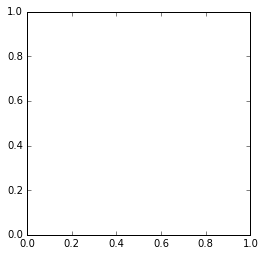

In [258]:
img = Image.open(filename)
plt.imshow(img)
img.close()

3 188


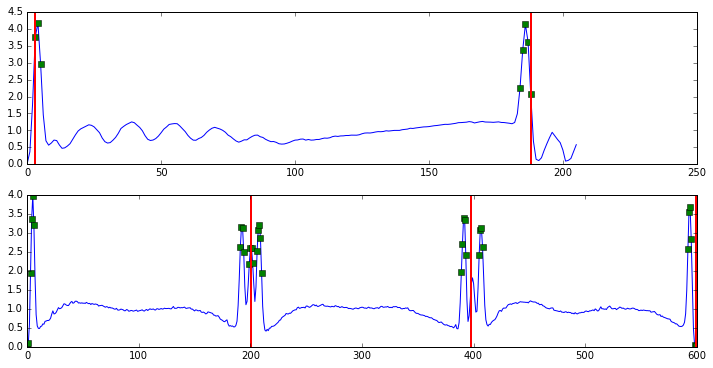

In [247]:
def segment(image, axis=0, p=0.97, npix=30):
    '''
    axis == 0 for x
    axis == 1 for y
    '''
    a = np.mean(image, axis=axis)
    b = a/(1+np.std(image, axis=axis))
    ii = np.where(#(b > np.percentile(b,p*100)) &
                  (a > np.mean(a)+1.8*np.std(a)) |
                  (a < np.mean(a)-1.8*np.std(a)))[0]
    
    pts = []
    for i in ii:
        for p in pts:
            if any([np.abs(i-j)<npix for j in p]):
                p.append(i)
                break
        else:
            pts.append([i])
    pts = [
        np.min(p) if i == 0 else
        np.max(p) if i == (len(pts)-1) else
        np.mean(p)
        for i,p in enumerate(pts)
    ]
    return ii, a, sorted(pts)



fig, axes = plt.subplots(2,1, figsize=(12,6))
items = [['height',1],
         ['width', 0]]
for i,(ax,(name,axis)) in enumerate(zip(axes.flatten(),items)):
    plt.sca(ax)
    if name == 'height':
        ii,a,ypts = segment(image, axis)
        plt.plot(a)
        plt.plot(ii, a[ii], 's')
        for p in ypts:
            plt.axvline(p, color='r',lw=2)
    else:
        for imin,imax in zip(ypts, ypts[1:]):
            print(imin, imax)
            jj,b,xpts = segment(image[imin:imax,:], axis)
            plt.plot(b, 'b')
            plt.plot(jj, b[jj], 'sg')
            for p in xpts:
                plt.axvline(p, color='r',lw=2)
                                   

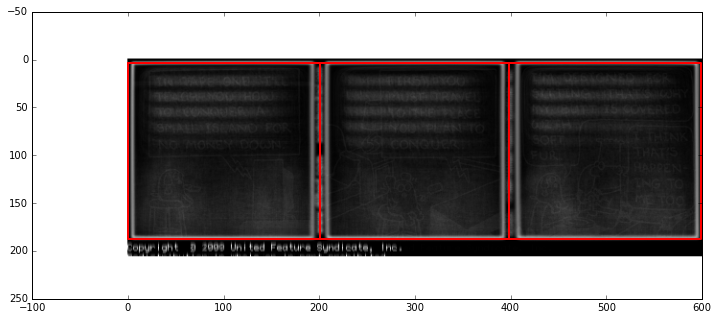

In [248]:
def yxsegment(image):
    ii,a,ypts = segment(image, 1)
    for ymin,ymax in zip(ypts, ypts[1:]):
        jj,b,xpts = segment(image[ymin:ymax,:], 0)
        for xmin, xmax in zip(xpts, xpts[1:]):
            yield xmin, xmax, ymin, ymax
plt.figure(figsize=(12,6))
plt.imshow(image, cmap=plt.cm.gray)
for box in yxsegment(image):
    plotBox(*box)

163.0
[  3   6   7 200 201 203 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 416 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 450 452 453
 454 455 470 471 631 632 633 634 635 636]


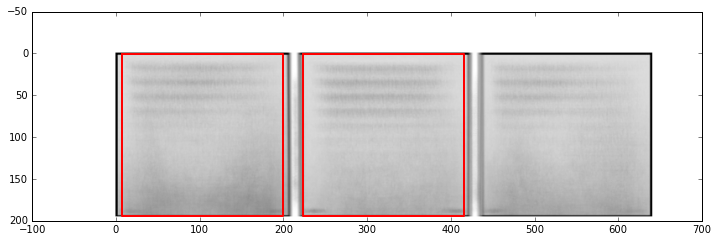

In [155]:

def plotBox(xmin, xmax, ymin, ymax):
    plt.plot([xmin, xmax, xmax, xmin, xmin],
             [ymin, ymin, ymax, ymax, ymin], color='r', lw=2)

def threshold(img, thresh=60):
    Y = np.zeros(img.shape)+255
    Y[img < thresh] = img[img < thresh]
    return(Y)

def carve(img, nx=None, ny=100, linethresh=None):
    nx = np.floor(img.shape[1]/3)-50
    print(nx)
    Y = threshold(img)
    linethresh = np.clip(np.percentile(np.mean(Y, axis=1), 4), 0, 180)
    ylines = np.where(np.mean(Y,1)<linethresh)[0]
    lines = (np.concatenate([[0], ylines,[img.shape[0]]]))
    deltas = np.diff(lines)
    yoffsets = lines[np.where(deltas>ny)[0]]#[::2]
    heights = deltas[np.where(deltas>ny)[0]]#[::2]
    
    for yoffset,height in zip(yoffsets, heights):
        X = Y[yoffset:yoffset+height,:]
        xmean = np.mean(X, axis=0)/np.std(X, axis=0)
        xp = np.percentile(xmean, 90)
        xlines = np.where(xmean > xp)[0]
        print(xlines)
        
        lines = np.concatenate([xlines,np.linspace(0, img.shape[1], 2)])
        lines = np.array(sorted(lines))
        deltas = np.diff(lines)
        xoffsets = lines[np.where(deltas>nx)[0]]#[::2]
        widths = deltas[np.where(deltas>nx)[0]]#[::2]
        
        for xoffset, width in zip(xoffsets, widths):
            yield xoffset, xoffset+width, yoffset, yoffset+height

            
plt.figure(figsize=(12,6))
plt.imshow(image, cmap=plt.cm.gray)
for box in carve(image):
    plotBox(*box)

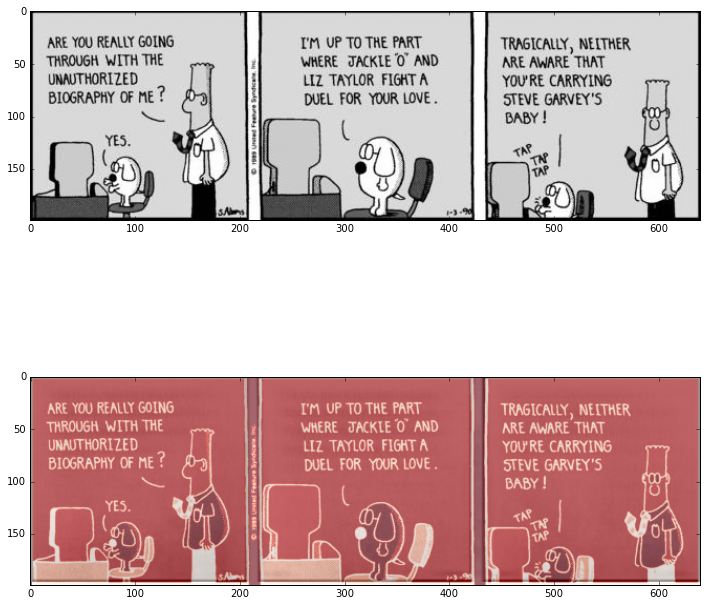

In [134]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,12))
ax1.imshow(x, cmap=plt.cm.gray)
ax2.imshow(image, cmap=plt.cm.gray)
ax2.imshow(x, cmap=plt.cm.Reds, alpha=0.6)

In [140]:
np.array(simpleshapes[(300,640)])

array([[304, 640]])

280 900


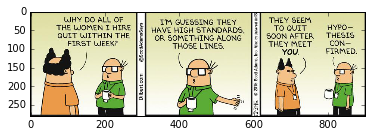

In [99]:
with Image.open(filename) as img:
    print(img.height, img.width)
    x = np.array(img)
    plt.imshow(x)

In [100]:
img.height, img.width, x.shape

(280, 900, (280, 900, 3))